# **Capstone Project - Machine Translation (NLP 2 Group 11)**

**CONTEXT:**
Machine Translation is the automated translation of source material into another language without human intervention. The database comes from ACL2014 Ninth workshop on Statistical Machine Translation. This workshop mainly focusses on language translation between European language pairs. The idea behind the workshop is to provide the ability for two parties to communicate and exchange the ideas from different
countries.

**DATA DESCRIPTION:**
The database is basically sentences in German/English of various events. Three datasets are obtained from Statistical Machine Translation workshop. Either the dataset can be downloaded from the link or can be used from the shared files. Three datasets are
- Europarl v7
- Common Crawl corpus
- News Commentary

**PROJECT OBJECTIVE:**
Design a Machine Translation model that can be used to translate sentences from German language to English language or vice-versa.



# **Milestone 1**

## **Step 1: Import and merge all the three datasets**

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### **Import and Read all files**

In [ ]:
# Set Dataset path
file_path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project - Machine Translation/Dataset/'

In [ ]:
# Define function to open given file, read sentences and add to list
def read_file(file_name, list_name):

    with open(file_name, 'r') as f:
        for line in f:
            list_name.append(line)

    return list_name

In [ ]:
# Read Common Crawl Files

common_crawl_en = []
common_crawl_de = []

read_file(file_path + 'commoncrawl.de-en_english.txt', common_crawl_en)
read_file(file_path + 'commoncrawl.de-en_german.txt', common_crawl_de)

print('Length of Common Crawl English Sentences File:',len(common_crawl_en))
print('Length of Common Crawl German Sentences File:',len(common_crawl_de))
print(' ')
print('English Sentence:',common_crawl_en[0])
print('German Sentence:',common_crawl_de[0])

Length of Common Crawl English Sentences File: 2399123
Length of Common Crawl German Sentences File: 2399123
 
English Sentence: iron cement is a ready for use paste which is laid as a fillet by putty knife or finger in the mould edges (corners) of the steel ingot mould.

German Sentence: iron cement ist eine gebrauchs-fertige Paste, die mit einem Spachtel oder den Fingern als Hohlkehle in die Formecken (Winkel) der Stahlguss -Kokille aufgetragen wird.



In [ ]:
# Read Europarl Files

europarl_en = []
europarl_de = []

read_file(file_path + 'europarl-v7.de-en_english.txt', europarl_en)
read_file(file_path + 'europarl-v7.de-en_german.txt', europarl_de)

print('Length of Europarl English Sentences File:',len(europarl_en))
print('Length of Europarl German Sentences File:',len(europarl_de))

print(' ')
print('English Sentence:',europarl_en[0])
print('German Sentence:',europarl_de[0])

Length of Europarl English Sentences File: 1920209
Length of Europarl German Sentences File: 1920209
 
English Sentence: Resumption of the session

German Sentence: Wiederaufnahme der Sitzungsperiode



In [ ]:
# Read News Commentary Files

news_commentary_en = []
news_commentary_de = []

read_file(file_path + 'news-commentary-v9.de-en_english.txt', news_commentary_en)
read_file(file_path + 'news-commentary-v9.de-en_german.txt', news_commentary_de)

print('Length of News Commentary English Sentences File:',len(news_commentary_en))
print('Length of News Commentary German Sentences File:',len(news_commentary_de))

print(' ')
print('English Sentence:',news_commentary_en[0])
print('German Sentence:',news_commentary_de[0])

Length of News Commentary English Sentences File: 201995
Length of News Commentary German Sentences File: 201854
 
English Sentence: $10,000 Gold?

German Sentence: Steigt Gold auf 10.000 Dollar?



*Note: No of lines in News Commentary - English and German files are different.*

Before selecting the sample data from each file and merging, let's perform some Data Analysis on all 3 files

### **Exploratory Data Analysis**

**Check Vocabulary**

In [ ]:
from collections import Counter

In [ ]:
# Define function to get vocab size
def get_vocab(en_list_name, de_list_name):
    all_words_en = [word for sentence in en_list_name for word in sentence.lower().split()]
    all_words_de = [word for sentence in de_list_name for word in sentence.lower().split()]

    total_words_en = len(all_words_en)/1000000
    total_words_de = len(all_words_de)/1000000

    unique_words_en = set(all_words_en)
    unique_words_de = set(all_words_de)

    return total_words_en, total_words_de, unique_words_en, unique_words_de

In [ ]:
# Get Total and Unique no of words from each file

total_words_cc_en, total_words_cc_de, unique_words_cc_en, unique_words_cc_de = get_vocab(common_crawl_en, common_crawl_de)
total_words_ep_en, total_words_ep_de, unique_words_ep_en, unique_words_ep_de = get_vocab(europarl_en, europarl_de)
total_words_nc_en, total_words_nc_de, unique_words_nc_en, unique_words_nc_de = get_vocab(news_commentary_en, news_commentary_de)

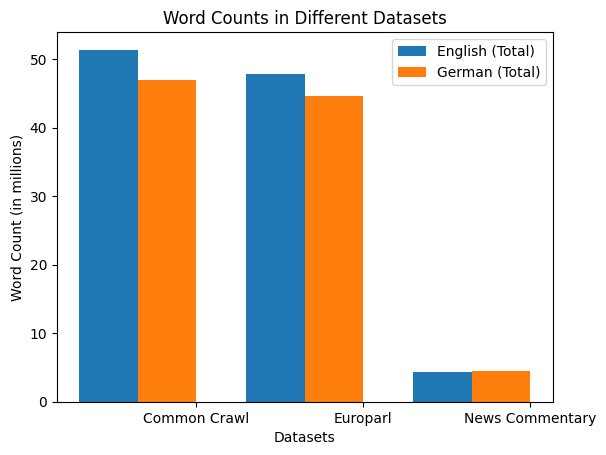

In [ ]:
# Total Word Count

total_words_en = [total_words_cc_en, total_words_ep_en, total_words_nc_en]
total_words_de = [total_words_cc_de, total_words_ep_de, total_words_nc_de]

datasets = ['Common Crawl', 'Europarl', 'News Commentary']

bar_width = 0.35
fig, ax = plt.subplots()

# Set bars for each dataset
bar1 = ax.bar(np.arange(len(datasets)), total_words_en, bar_width, label='English (Total)')
bar2 = ax.bar(np.arange(len(datasets)) + bar_width, total_words_de, bar_width, label='German (Total)')

# Add labels, title, and legend
ax.set_xlabel('Datasets')
ax.set_ylabel('Word Count (in millions)')
ax.set_title('Word Counts in Different Datasets')
ax.set_xticks(np.arange(len(datasets)) + 1.5*bar_width)
ax.set_xticklabels(datasets)
ax.legend()

# Display the plot
plt.show()

In [ ]:
# Unique Word Count

print("Common Crawl:")
print("English (Unique)-", len(unique_words_cc_en))
print("German (Unique)-", len(unique_words_cc_de))

print(' ')
print("Europarl:")
print("English (Unique)-", len(unique_words_ep_en))
print("German (Unique)-", len(unique_words_ep_de))

print(' ')
print("News Commentary:")
print("English (Unique)-", len(unique_words_nc_en))
print("German (Unique)-", len(unique_words_nc_en))

Common Crawl:
English (Unique)- 1532712
German (Unique)- 2557806
 
Europarl:
English (Unique)- 271951
German (Unique)- 616947
 
News Commentary:
English (Unique)- 139001
German (Unique)- 139001


**Check and Remove Blank Lines**



In [ ]:
# Define function to check for blank lines in given file
def check_blank(list_name):
    blank_lines_index = []
    for i in range(len(list_name)):
        if list_name[i] == '\n':
            blank_lines_index.append(i)

    return blank_lines_index

In [ ]:
common_crawl_en_blanks = check_blank(common_crawl_en)
print('No of blank lines in Common Crawl English File:',len(common_crawl_en_blanks))

common_crawl_de_blanks = check_blank(common_crawl_de)
print('No of blank lines in Common Crawl German File:',len(common_crawl_de_blanks))

europarl_en_blanks = check_blank(europarl_en)
print('No of blank lines in Europarl English File:',len(europarl_en_blanks))

europarl_de_blanks = check_blank(europarl_de)
print('No of blank lines in Europarl German File:',len(europarl_de_blanks))

news_commentary_en_blanks = check_blank(news_commentary_en)
print('No of blank lines in News Commentary English File:',len(news_commentary_en_blanks))

news_commentary_de_blanks = check_blank(news_commentary_de)
print('No of blank lines in News Commentary German File:',len(news_commentary_de_blanks))

No of blank lines in Common Crawl English File: 0
No of blank lines in Common Crawl German File: 0
No of blank lines in Europarl English File: 8366
No of blank lines in Europarl German File: 2923
No of blank lines in News Commentary English File: 322
No of blank lines in News Commentary German File: 224


In [ ]:
# Define function to remove blank lines
def remove_blanks(list_name, blanks_list):
    for index in sorted(blanks_list, reverse=True):
        if index < len(list_name):
            del list_name[index]

    return list_name

In [ ]:
# Combine indices of lines to be removed
europarl_blanks = sorted(europarl_en_blanks + europarl_de_blanks)
news_commentary_blanks = sorted(news_commentary_en_blanks + news_commentary_de_blanks)

# Remove lines
print('Europarl English File Length, after removing blank lines:',len(remove_blanks(europarl_en, europarl_blanks)))
print('Europarl German File Length:',len(remove_blanks(europarl_de, europarl_blanks)))

print(' ')
print('News Commentary English File Length, after removing blank lines:',len(remove_blanks(news_commentary_en, news_commentary_blanks)))
print('News Commentary German File Length,after removing blank lines:',len(remove_blanks(news_commentary_de, news_commentary_blanks)))

Europarl English File Length, after removing blank lines: 1908920
Europarl German File Length: 1908920
 
News Commentary English File Length, after removing blank lines: 201449
News Commentary German File Length,after removing blank lines: 201309


### **Merge the datasets**

- Since the size of datasets is quite bug, it will not be feasible to use entire datasets for training, due to amount of computing resources and training time which will be required.
- So, for training we will take 10000 sentences from each original dataset and merge to form a common English and German dataset

In [ ]:
# Merge the three lists
en_sentences = common_crawl_en[:10000] + europarl_en[:10000] + news_commentary_en[:10000]
de_sentences = common_crawl_de[:10000] + europarl_de[:10000] + news_commentary_de[:10000]

# Print the lengths of the merged lists
print('Length of Merged English File:', len(en_sentences))
print('Length of Merged German File:', len(de_sentences))

Length of Merged English File: 30000
Length of Merged German File: 30000


In [ ]:
# Create a DataFrame from the merged lists
df = pd.DataFrame({'english': en_sentences, 'german': de_sentences})

df.head()

,english,german
0,iron cement is a ready for use paste which is ...,"iron cement ist eine gebrauchs-fertige Paste, ..."
1,iron cement protects the ingot against the hot...,Nach der Aushärtung schützt iron cement die Ko...
2,"a fire restant repair cement for fire places, ...",feuerfester Reparaturkitt für Feuerungsanlagen...
3,Construction and repair of highways and...\n,Der Bau und die Reparatur der Autostraßen...\n
4,An announcement must be commercial character.\n,die Mitteilungen sollen den geschäftlichen kom...


In [ ]:
df.tail()

,english,german
29995,If the developed world is able to pay trillion...,"Wenn die Industrieländer in der Lage sind, meh..."
29996,Clearly this is not about the availability of ...,Es geht dabei eindeutig nicht um das Vorhanden...
29997,It is about the inappropriate priorities in ho...,Es geht um unangemessene Prioritäten und darum...
29998,It is about moral values that make it appropri...,"Es geht um moralische Werte, die es angemessen..."
29999,I cannot believe that people in developed coun...,"Ich kann nicht glauben, dass die Menschen in d..."


In [ ]:
df.shape

(30000, 2)

## **Step 2: Data Cleaning**

- Previously, we have already checked and removed all blank lines from each of the files, before selecting the sample data from each file and merging them.
- As part of data cleaning, we will now check for any NULL values, remove punctuation marks and covert the text to lowercase


**Check for any NULL values**

In [ ]:
df.isnull().sum()

,0
english,0
german,0


Since we have removed all the blank lines, there are no NULL values remaining in the training data.

**Remove Punctuation Marks and Convert to Lowercase**

In [ ]:
import string

# Define function to remove puntuation marks and numbers, and then convert to lowercase
def clean_text(text):
    text = text.replace('”', ''). replace('“','').replace("‘",'').replace("’",'').replace("’s",'').replace("'s",'').replace('\xa0','')
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits)).lower().strip()
    return text

In [ ]:
df['english_cleaned'] = df['english'].apply(lambda x: clean_text(x))
df['german_cleaned'] = df['german'].apply(lambda x: clean_text(x))

df.tail()

,english,german,english_cleaned,german_cleaned
29995,If the developed world is able to pay trillion...,"Wenn die Industrieländer in der Lage sind, meh...",if the developed world is able to pay trillion...,wenn die industrieländer in der lage sind mehr...
29996,Clearly this is not about the availability of ...,Es geht dabei eindeutig nicht um das Vorhanden...,clearly this is not about the availability of ...,es geht dabei eindeutig nicht um das vorhanden...
29997,It is about the inappropriate priorities in ho...,Es geht um unangemessene Prioritäten und darum...,it is about the inappropriate priorities in ho...,es geht um unangemessene prioritäten und darum...
29998,It is about moral values that make it appropri...,"Es geht um moralische Werte, die es angemessen...",it is about moral values that make it appropri...,es geht um moralische werte die es angemessen ...
29999,I cannot believe that people in developed coun...,"Ich kann nicht glauben, dass die Menschen in d...",i cannot believe that people in developed coun...,ich kann nicht glauben dass die menschen in de...


## **Step 3: NLP Pre-processing**

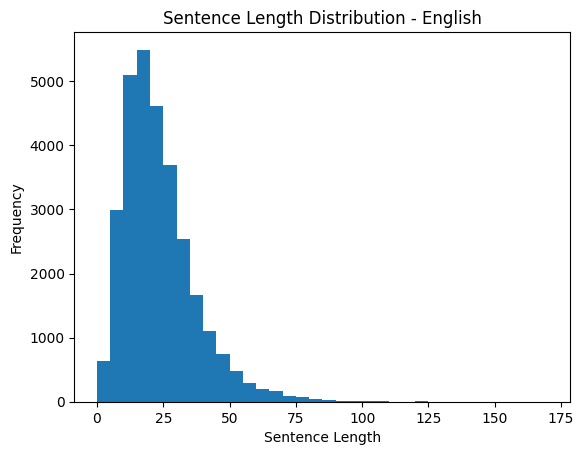

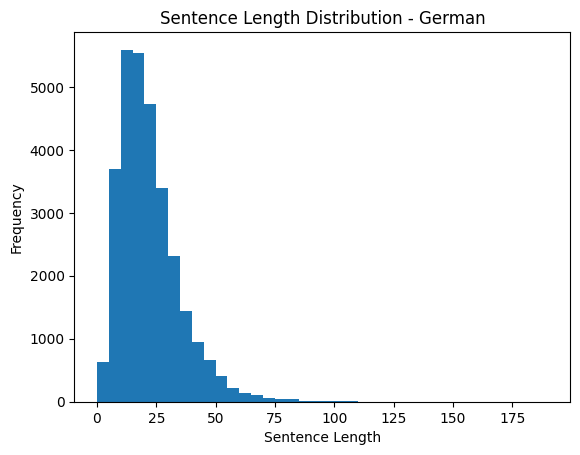

In [ ]:
# Plot sentence length distribution for each language

def plot_sentence_lengths(sentences, language):
    lengths = [len(sentence.split()) for sentence in sentences]
    plt.hist(lengths, bins=range(0, max(lengths) + 1, 5))
    plt.title(f'Sentence Length Distribution - {language}')
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    plt.show()

plot_sentence_lengths(df['english_cleaned'], 'English')
plot_sentence_lengths(df['german_cleaned'], 'German')

In [ ]:
# Get Maximum sentence length for each language

max_length_english = int(df['english_cleaned'].str.split().str.len().max())
print("Maximum English Sentence length:", max_length_english)

max_length_german = int(df['german_cleaned'].str.split().str.len().max())
print("Maximum German Sentence length:", max_length_german)

Maximum English Sentence length: 172
Maximum German Sentence length: 193


#### **Tokenization and Padding**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Define function to perform tokenization and padding
def tokenization(sentences, max_length):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    sequences = tokenizer.texts_to_sequences(sentences)
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

    return tokenizer, padded_sequences

In [ ]:
# Tokenize and Pad Sentences
en_tokenizer, en_padded_sequences = tokenization(df['english_cleaned'].tolist(),max_length_english)
de_tokenizer, de_padded_sequences = tokenization(df['german_cleaned'].tolist(),max_length_german)

# Get vocabulary size
en_vocab_size = len(en_tokenizer.word_index)+1
print("English Vocabulary size:", en_vocab_size)

de_vocab_size = len(de_tokenizer.word_index)+1
print("German Vocabulary size:", de_vocab_size)

# Check Padded Sequence Shape
print("English Padded Sequence Shape:", en_padded_sequences.shape)
print("German Padded Sequence Shape:", de_padded_sequences.shape)

English Vocabulary size: 31646
German Vocabulary size: 57414
English Padded Sequence Shape: (30000, 172)
German Padded Sequence Shape: (30000, 193)


In [ ]:
# Changing the format of German Tokenizer from word:index to index:word, to be used for translation later
ger_tokenizer = de_tokenizer.word_index

reverse_ger_tokenizer = {}
for word, i in ger_tokenizer.items():
    reverse_ger_tokenizer[i] = word

In [ ]:
# Check Sample Sentence and its Padded Sequence
print('Actual English Sentence:')
print(df['english_cleaned'].tolist()[0])

print('Tokenized and Padded English Sentence:')
print(en_padded_sequences[0])

print(' ')
print('Actual German Sentence:')
print(df['german_cleaned'].tolist()[0])

print('Tokenized and Padded German Sentence:')
print(de_padded_sequences[0])

Actual English Sentence:
iron cement is a ready for use paste which is laid as a fillet by putty knife or finger in the mould edges corners of the steel ingot mould
Tokenized and Padded English Sentence:
[ 3664  8159     7     6  1467     9   130 13175    22     7  1916    16
     6 17591    21 17592 17593    31  9317     5     1 10807  9318  4796
     2     1  1418 10808 10807     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0

## **Step 4: Design, Train and Test Simple RNN and LSTM Models (without Embeddings)**

Since we are building an English to German translation model, English sentences will be our input and German sentences will be output.

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Input, Dropout, Dense
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [ ]:
# Split the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(en_padded_sequences, de_padded_sequences, test_size=0.1, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (27000, 172)
Shape of y_train: (27000, 193)
Shape of X_test: (3000, 172)
Shape of y_test: (3000, 193)


#### **Build, Train and Test a Simple RNN Model (without Embeddings)**

In [ ]:
# Define function to build and compile RNN model
def simple_rnn_model(input_shape, output_sequence_length, english_vocab_size, german_vocab_size):
    model = Sequential()
    model.add(Input(shape=input_shape[1:]))
    model.add(SimpleRNN(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(german_vocab_size, activation='softmax'))

    optimizer = Adam(learning_rate=0.001, clipvalue=0.5)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Reshaping the output (Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions)
y_train_reshaped = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)
print("German Padded Sequences New Shape:", y_train_reshaped.shape)

German Padded Sequences New Shape: (27000, 193, 1)


In [ ]:
# Reshaping the input (to be same as output)
X_train_reshaped = pad_sequences(X_train, maxlen=max_length_german, padding='post')
X_train_reshaped = X_train_reshaped.reshape((-1, X_train_reshaped.shape[1], 1))
print("English Padded Sequences New Shape:", X_train_reshaped.shape)

English Padded Sequences New Shape: (27000, 193, 1)


In [ ]:
# Build and Compile the model
simple_rnn = simple_rnn_model(X_train_reshaped.shape, max_length_german, en_vocab_size, de_vocab_size)

simple_rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 193, 64)             │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 193, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 193, 59642)          │       3,876,730 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,880,954 (14.80 MB)

 Trainable params: 3,880,954 (14.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.utils import plot_model

plot_model(simple_rnn, to_file='simple_rnn_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model
filename = 'mt_simple_rnn_model.keras'
checkpoint = ModelCheckpoint(filename, monitor='val_accuracy', mode='max', save_best_only=True)   # Create checkpoint to save the model with best validation accuracy

simple_rnn_history = simple_rnn.fit(X_train_reshaped, y_train_reshaped, validation_split=0.2, epochs=5, batch_size=64, callbacks=[checkpoint], verbose=1)

Epoch 1/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 115s 303ms/step - accuracy: 0.8123 - loss: 5.1235 - val_accuracy: 0.8880 - val_loss: 0.9663
Epoch 2/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 123s 279ms/step - accuracy: 0.8867 - loss: 0.9715 - val_accuracy: 0.8881 - val_loss: 0.9551
Epoch 3/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 141s 276ms/step - accuracy: 0.8862 - loss: 0.9641 - val_accuracy: 0.8881 - val_loss: 0.9547
Epoch 4/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 143s 279ms/step - accuracy: 0.8853 - loss: 0.9655 - val_accuracy: 0.8881 - val_loss: 0.9553
Epoch 5/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 141s 278ms/step - accuracy: 0.8863 - loss: 0.9539 - val_accuracy: 0.8879 - val_loss: 0.9568


In [ ]:
# Get the training and validaiton loss
loss = simple_rnn_history.history['loss']
val_loss = simple_rnn_history.history['val_loss']

# Get the training and validation accuracy
acc = simple_rnn_history.history['accuracy']
val_acc = simple_rnn_history.history['val_accuracy']

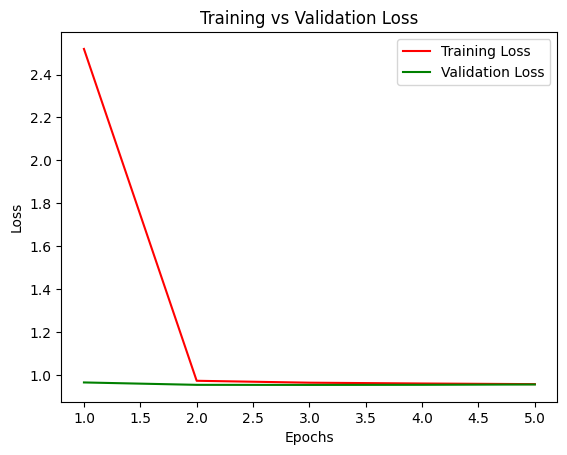

In [ ]:
# Plot training and validation loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

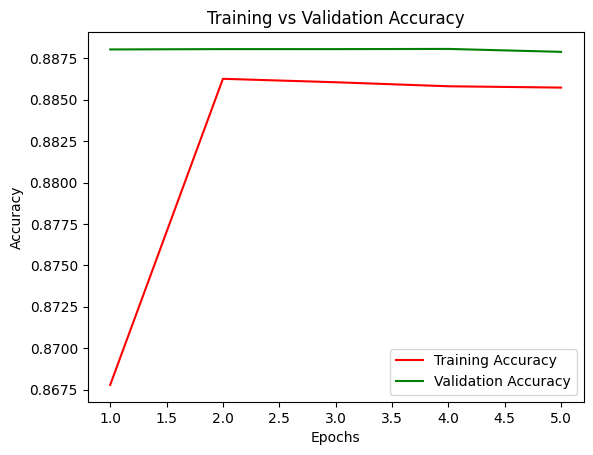

In [ ]:
# Plot training and validation accuracy
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Test the model
simple_rnn_model = load_model('mt_simple_rnn_model.keras')

print("Model output shape:", simple_rnn_model.output_shape)

Model output shape: (None, 193, 59642)


In [ ]:
# Reshaping the output (Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions)
y_test_reshaped = y_test.reshape(*y_test.shape, 1)
print("German Test Data New Shape:", y_test_reshaped.shape)

German Test Data New Shape: (3000, 193, 1)


In [ ]:
# Reshaping the input (to be same as output)
X_test_reshaped = pad_sequences(X_test, maxlen=max_length_german, padding='post')
X_test_reshaped = X_test_reshaped.reshape((-1, X_test_reshaped.shape[1], 1))
print("English Test Data New Shape:", X_test_reshaped.shape)

English Test Data New Shape: (3000, 193, 1)


In [ ]:
# Evaluate the model on 100 samples from Test data
loss, accuracy = simple_rnn_model.evaluate(X_test_reshaped[:100], y_test_reshaped[:100], verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.9517783522605896
Test Accuracy: 0.8900517821311951


Even with a Simple RNN model without Embedding, we have a very good accuracy of 90%

#### **Build, Train and Test Simple LSTM Model (without Embeddings)**

In [ ]:
# Define function to build and compile RNN model
def simple_lstm_model(input_shape, output_sequence_length, english_vocab_size, german_vocab_size):
    model = Sequential()
    model.add(Input(shape=input_shape[1:]))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(german_vocab_size, activation='softmax'))

    optimizer = Adam(learning_rate=0.001, clipvalue=0.5)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Build and Compile the model
simple_lstm = simple_lstm_model(X_train_reshaped.shape, max_length_german, en_vocab_size, de_vocab_size)

simple_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 193, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 193, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 193, 59642)          │       3,876,730 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,893,626 (14.85 MB)

 Trainable params: 3,893,626 (14.85 MB)

 Non-trainable params: 0 (0.00 B)

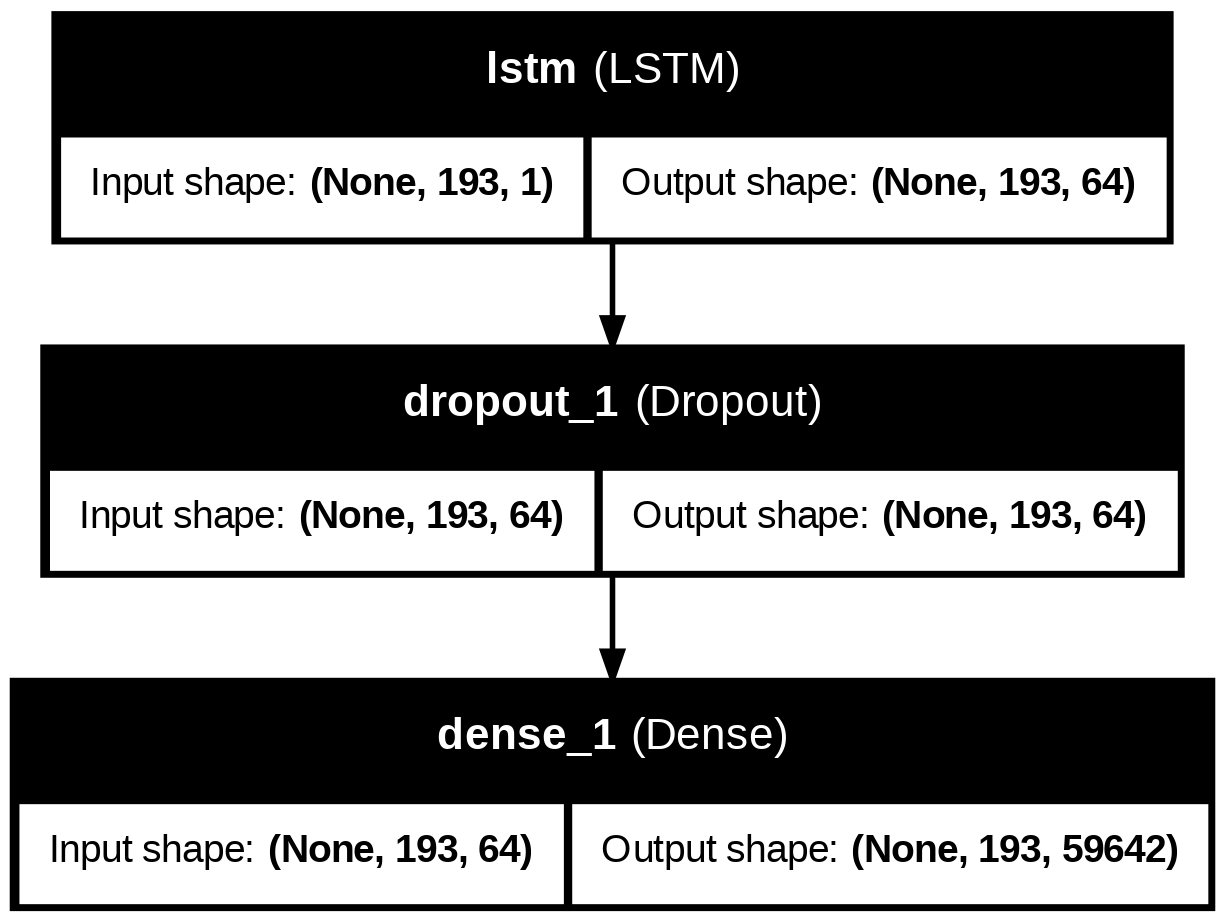

In [ ]:
from keras.utils import plot_model

plot_model(simple_lstm, to_file='simple_lstm_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model
filename = 'mt_simple_lstm_model.keras'
checkpoint = ModelCheckpoint(filename, monitor='val_accuracy', mode='max', save_best_only=True)   # Create checkpoint to save the model with best validation accuracy

simple_lstm_history = simple_lstm.fit(X_train_reshaped, y_train_reshaped, validation_split=0.2, epochs=5, batch_size=64, callbacks=[checkpoint], verbose=1)

Epoch 1/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 203s 586ms/step - accuracy: 0.8665 - loss: 5.1829 - val_accuracy: 0.8877 - val_loss: 0.9630
Epoch 2/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 198s 584ms/step - accuracy: 0.8873 - loss: 0.9686 - val_accuracy: 0.8877 - val_loss: 0.9534
Epoch 3/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 203s 586ms/step - accuracy: 0.8864 - loss: 0.9620 - val_accuracy: 0.8881 - val_loss: 0.9520
Epoch 4/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 214s 622ms/step - accuracy: 0.8866 - loss: 0.9571 - val_accuracy: 0.8884 - val_loss: 0.9511
Epoch 5/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 249s 585ms/step - accuracy: 0.8874 - loss: 0.9491 - val_accuracy: 0.8885 - val_loss: 0.9514


In [ ]:
# Get the training and validaiton loss
loss = simple_lstm_history.history['loss']
val_loss = simple_lstm_history.history['val_loss']

# Get the training and validation accuracy
acc = simple_lstm_history.history['accuracy']
val_acc = simple_lstm_history.history['val_accuracy']

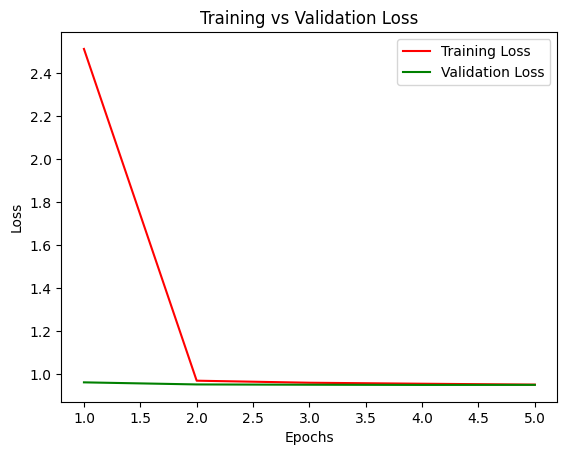

In [ ]:
# Plot training and validation loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

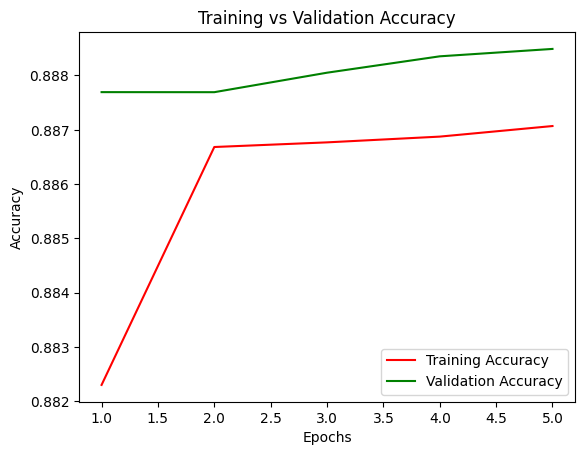

In [ ]:
# Plot training and validation accuracy
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Test the model
simple_lstm_model = load_model('mt_simple_lstm_model.keras')

print("Model output shape:", simple_lstm_model.output_shape)

Model output shape: (None, 193, 59642)


In [ ]:
# Evaluate the model on 100 samples from Test data
loss, accuracy = simple_lstm_model.evaluate(X_test_reshaped[:100], y_test_reshaped[:100], verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.8728080987930298
Test Accuracy: 0.9013472199440002


Simple LSTM model without Embeddings, results in a slightly higher accuracy of ~90%

## **Step 5: Interim Report**

***Project Interim Report_Machine Translation_NLP2_Group11***

# **Milestone 2**

## **Step 1: Design, Train and Test Simple RNN and LSTM Models (with Embeddings)**

In [ ]:
from keras.layers import Embedding, TimeDistributed

#### **Build, Train and Test a RNN Model (with Embeddings)**

In [ ]:
def embed_rnn_model():
    model = Sequential()
    model.add(Input(shape=(max_length_german,)))
    model.add(Embedding(input_dim=en_vocab_size, output_dim=128, input_length=max_length_german))
    model.add(SimpleRNN(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(de_vocab_size, activation='softmax'))

    optimizer = Adam(learning_rate=0.001, clipvalue=0.5)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Reshaping the input (to be same as output)
X_train_reshaped = pad_sequences(X_train, maxlen=max_length_german, padding='post')
print("English Padded Sequences New Shape:", X_train_reshaped.shape)

English Padded Sequences New Shape: (27000, 193)


In [ ]:
# Build and Compile the model
embed_rnn = embed_rnn_model()

embed_rnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 193, 128)            │       4,050,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 193, 64)             │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 193, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 193, 57414)          │       3,731,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,794,950 (29.74 MB)

 Trainable params: 7,794,950 (29.74 MB)

 Non-trainable params: 0 (0.00 B)

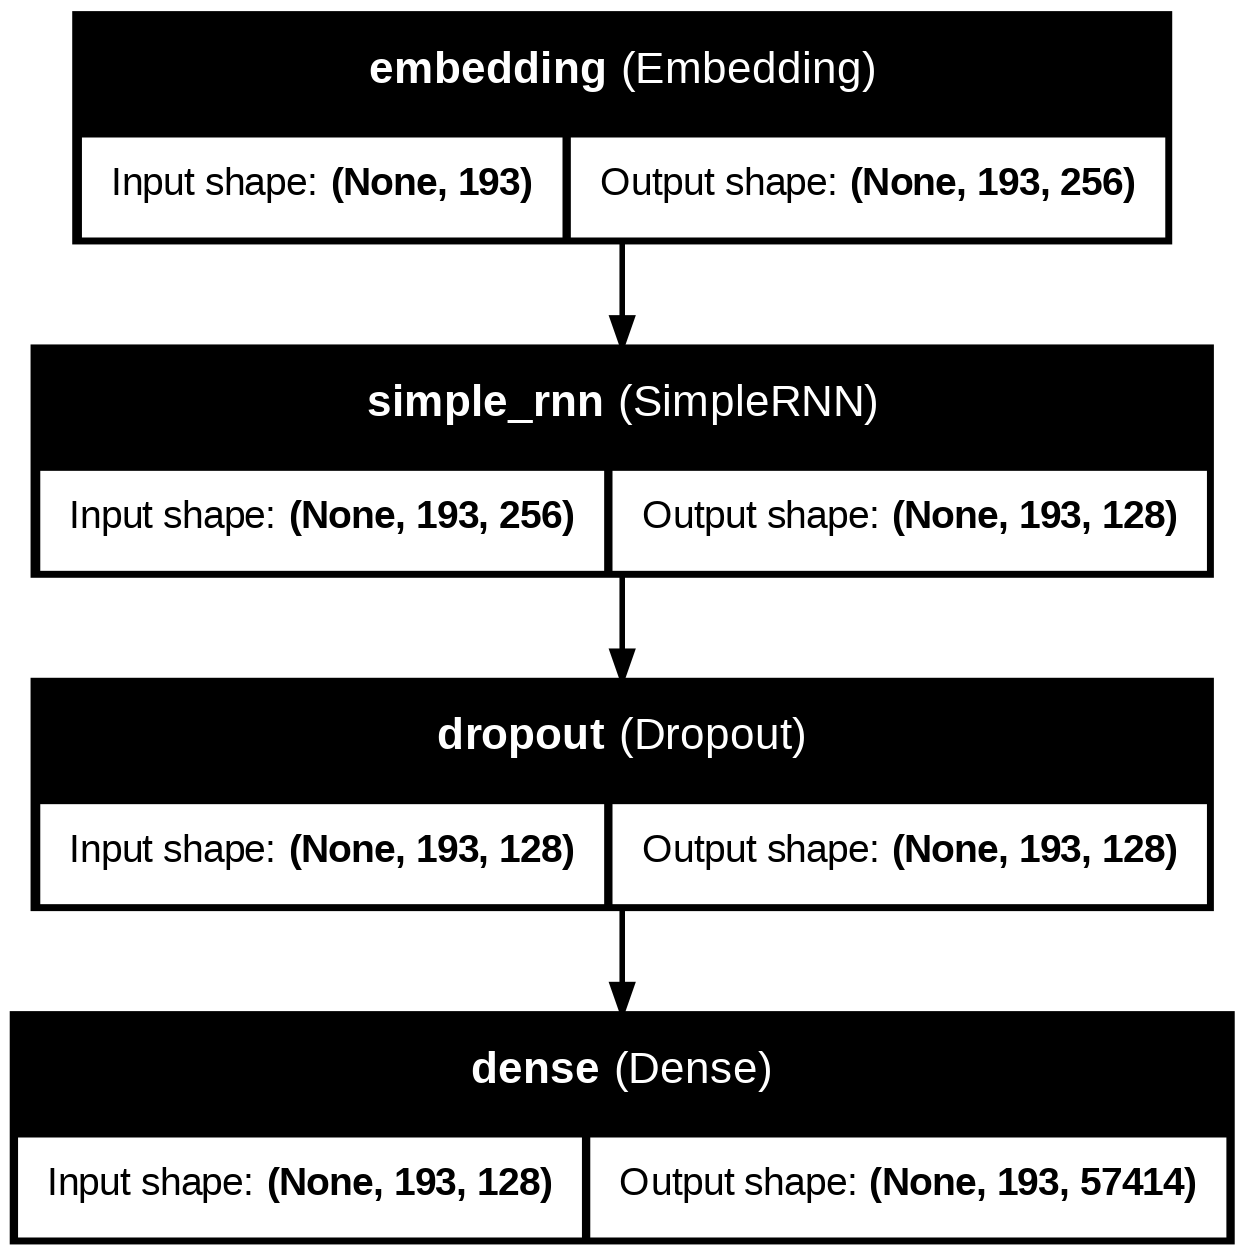

In [ ]:
from keras.utils import plot_model

plot_model(embed_rnn, to_file='embed_rnn_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model
filename = 'mt_embed_rnn_model.keras'
checkpoint = ModelCheckpoint(filename, monitor='val_accuracy', mode='max', save_best_only=True)   # Create checkpoint to save the model with best validation accuracy

embed_rnn_history = embed_rnn.fit(X_train_reshaped, y_train, validation_split=0.2, epochs=5, batch_size=64, callbacks=[checkpoint], verbose=1)

Epoch 1/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 95s 256ms/step - accuracy: 0.8665 - loss: 4.8125 - val_accuracy: 0.8889 - val_loss: 0.9588
Epoch 2/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 82s 244ms/step - accuracy: 0.8866 - loss: 0.9783 - val_accuracy: 0.8890 - val_loss: 0.9463
Epoch 3/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 86s 255ms/step - accuracy: 0.8876 - loss: 0.9521 - val_accuracy: 0.8902 - val_loss: 0.9326
Epoch 4/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 86s 255ms/step - accuracy: 0.8884 - loss: 0.9370 - val_accuracy: 0.8894 - val_loss: 0.9280
Epoch 5/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 87s 256ms/step - accuracy: 0.8905 - loss: 0.9142 - val_accuracy: 0.8901 - val_loss: 0.9243


In [ ]:
# Get the training and validaiton loss
loss = embed_rnn_history.history['loss']
val_loss = embed_rnn_history.history['val_loss']

# Get the training and validation accuracy
acc = embed_rnn_history.history['accuracy']
val_acc = embed_rnn_history.history['val_accuracy']

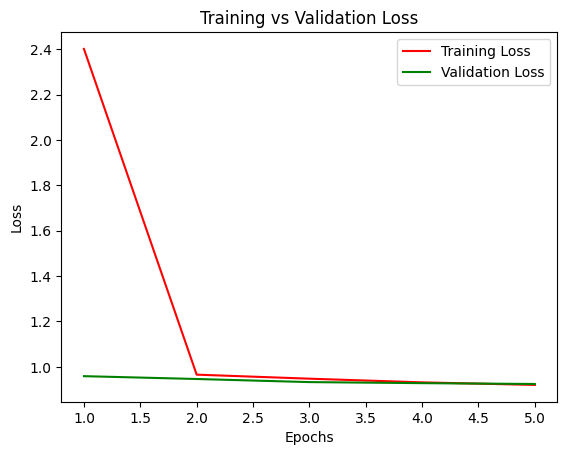

In [ ]:
# Plot training and validation loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

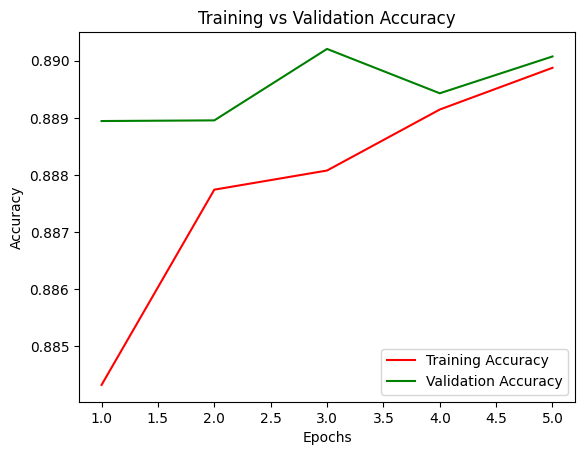

In [ ]:
# Plot training and validation accuracy
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Test the model
embed_rnn_model = load_model('mt_embed_rnn_model.keras')

print("Model output shape:", embed_rnn_model.output_shape)

Model output shape: (None, 193, 57414)


In [ ]:
# Reshaping the input (to be same as output)
X_test_reshaped = pad_sequences(X_test, maxlen=max_length_german, padding='post')
print("English Test Data New Shape:", X_test_reshaped.shape)

English Test Data New Shape: (3000, 193)


In [ ]:
# Evaluate the model on 100 samples from Test data
loss, accuracy = embed_rnn_model.evaluate(X_test_reshaped[:100], y_test[:100], verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.9261179566383362
Test Accuracy: 0.8926424384117126


Simple RNN model with Embedding, also gives us a very good accuracy of ~89.26%

#### **Build, Train and Test LSTM Model (with Embeddings)**

In [ ]:
def embed_lstm_model():
    model = Sequential()
    model.add(Input(shape=(max_length_german,)))
    model.add(Embedding(input_dim=en_vocab_size, output_dim=128, input_length=max_length_german))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(de_vocab_size, activation='softmax'))

    optimizer = SGD(learning_rate=0.001, clipvalue=0.5)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Build and Compile the model
embed_lstm = embed_lstm_model()

embed_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 193, 128)            │       4,050,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 193, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 193, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 193, 57414)          │       3,731,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,832,006 (29.88 MB)

 Trainable params: 7,832,006 (29.88 MB)

 Non-trainable params: 0 (0.00 B)

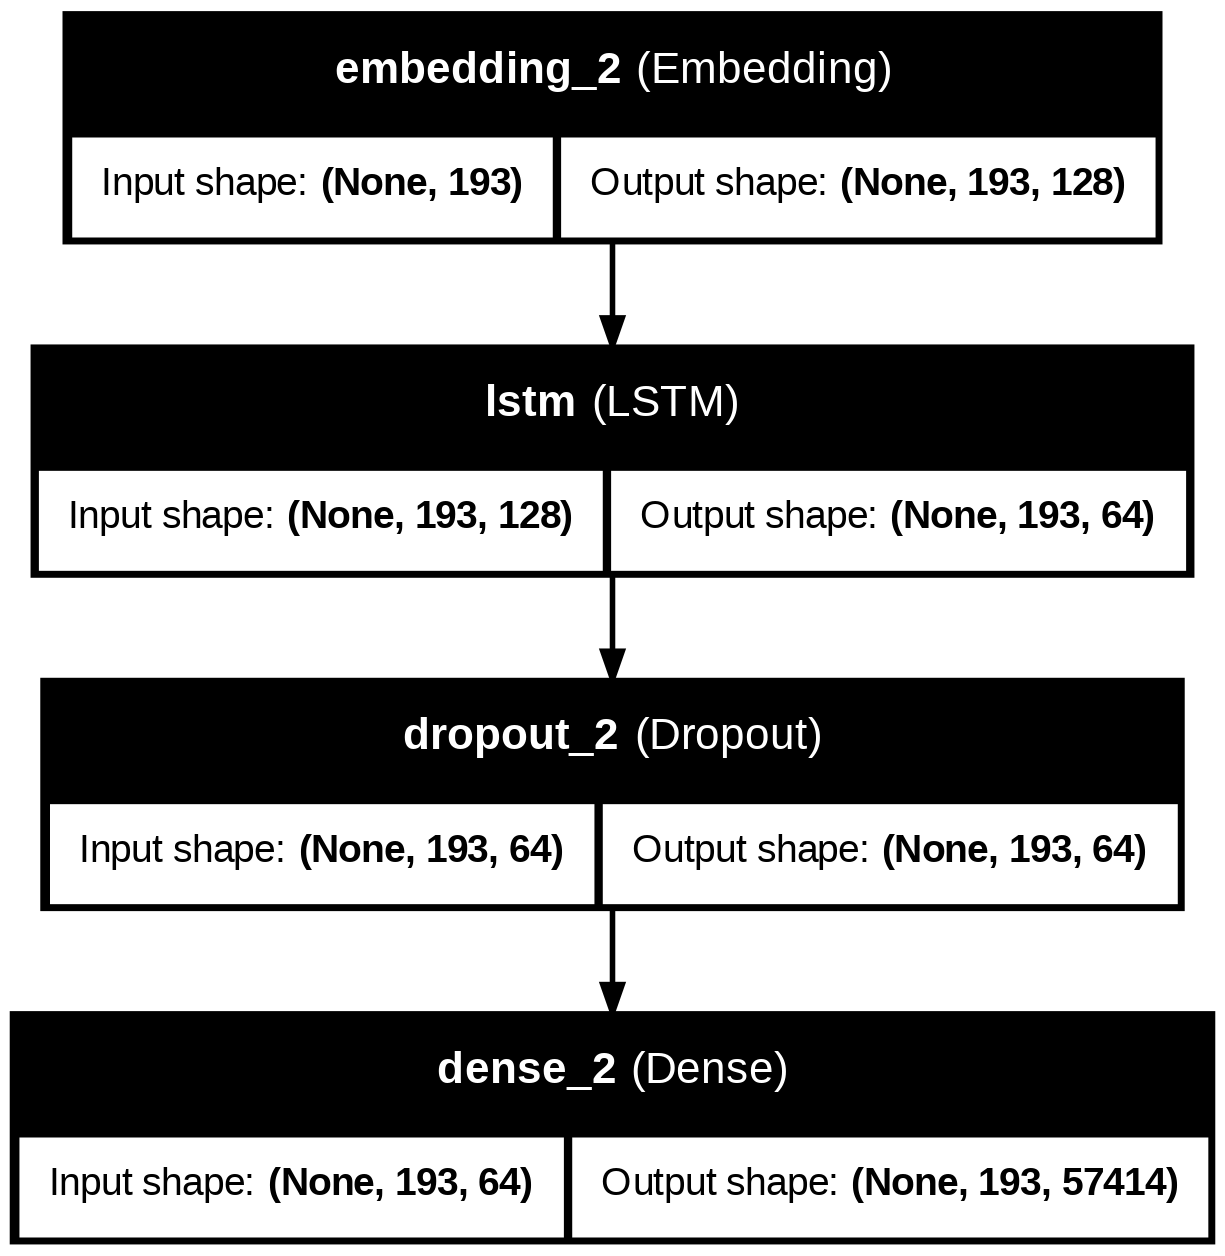

In [ ]:
from keras.utils import plot_model

plot_model(embed_lstm, to_file='embed_lstm_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Reshaping the input (to be same as output)
X_train_reshaped = pad_sequences(X_train, maxlen=max_length_german, padding='post')
print("English Padded Sequences New Shape:", X_train_reshaped.shape)

English Padded Sequences New Shape: (27000, 193)


In [ ]:
# Train the model
filename = 'mt_embed_lstm_model.keras'
checkpoint = ModelCheckpoint(filename, monitor='val_accuracy', mode='max', save_best_only=True)   # Create checkpoint to save the model with best validation accuracy

embed_lstm_history = embed_lstm.fit(X_train_reshaped, y_train, validation_split=0.2, epochs=5, batch_size=64, callbacks=[checkpoint], verbose=1)

Epoch 1/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 185s 538ms/step - accuracy: 0.7767 - loss: 10.9179 - val_accuracy: 0.8889 - val_loss: 10.7959
Epoch 2/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 184s 545ms/step - accuracy: 0.8875 - loss: 10.7536 - val_accuracy: 0.8889 - val_loss: 10.6172
Epoch 3/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 184s 545ms/step - accuracy: 0.8876 - loss: 10.5635 - val_accuracy: 0.8889 - val_loss: 10.3619
Epoch 4/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 184s 546ms/step - accuracy: 0.8878 - loss: 10.2471 - val_accuracy: 0.8889 - val_loss: 9.6702
Epoch 5/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 185s 547ms/step - accuracy: 0.8880 - loss: 9.2345 - val_accuracy: 0.8889 - val_loss: 7.2548


In [ ]:
# Get the training and validaiton loss
loss = embed_lstm_history.history['loss']
val_loss = embed_lstm_history.history['val_loss']

# Get the training and validation accuracy
acc = embed_lstm_history.history['accuracy']
val_acc = embed_lstm_history.history['val_accuracy']

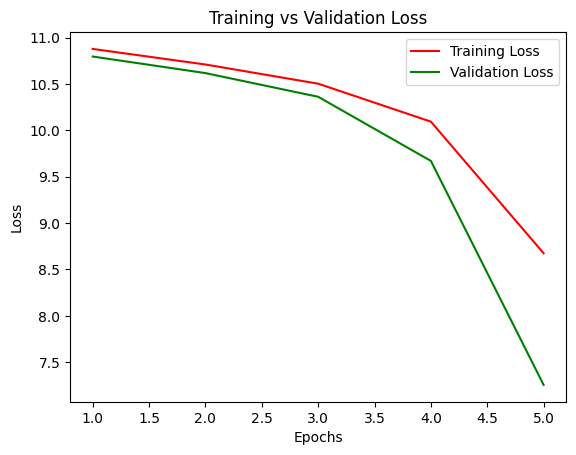

In [ ]:
# Plot training and validation loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

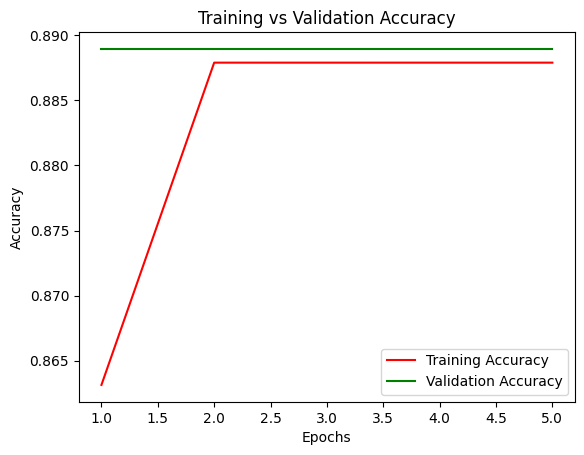

In [ ]:
# Plot training and validation accuracy
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Test the model
embed_lstm_model = load_model('mt_embed_lstm_model.keras')

print("Model output shape:", embed_lstm_model.output_shape)

Model output shape: (None, 193, 57414)


In [ ]:
# Reshaping the input (to be same as output)
X_test_reshaped = pad_sequences(X_test, maxlen=max_length_german, padding='post')
print("English Test Data New Shape:", X_test_reshaped.shape)

English Test Data New Shape: (3000, 193)


In [ ]:
# Evaluate the model on 100 samples from Test data
loss, accuracy = embed_lstm_model.evaluate(X_test_reshaped[:100], y_test[:100], verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 10.795449256896973
Test Accuracy: 0.8914507031440735


LSTM model with Embedding, also gives us a very good accuracy of ~89.14%

## **Step 2: Design, Train and Test Bi-Directional RNN and LSTM Models**

In [ ]:
from keras.layers import Bidirectional

#### **Build, Train and Test a Bi-Directional RNN Model**

In [ ]:
def bidirec_rnn_model():
    model = Sequential()
    model.add(Input(shape=(max_length_german,)))
    model.add(Embedding(input_dim=en_vocab_size, output_dim=128, input_length=max_length_german))
    model.add(Bidirectional(SimpleRNN(64, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Dense(de_vocab_size, activation='softmax'))

    optimizer = SGD(learning_rate=0.001, clipvalue=0.5)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Build and Compile the model
bidirec_rnn = bidirec_rnn_model()

bidirec_rnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 193, 128)            │       4,050,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 193, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 193, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 193, 57414)          │       7,406,406 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,481,798 (43.80 MB)

 Trainable params: 11,481,798 (43.80 MB)

 Non-trainable params: 0 (0.00 B)

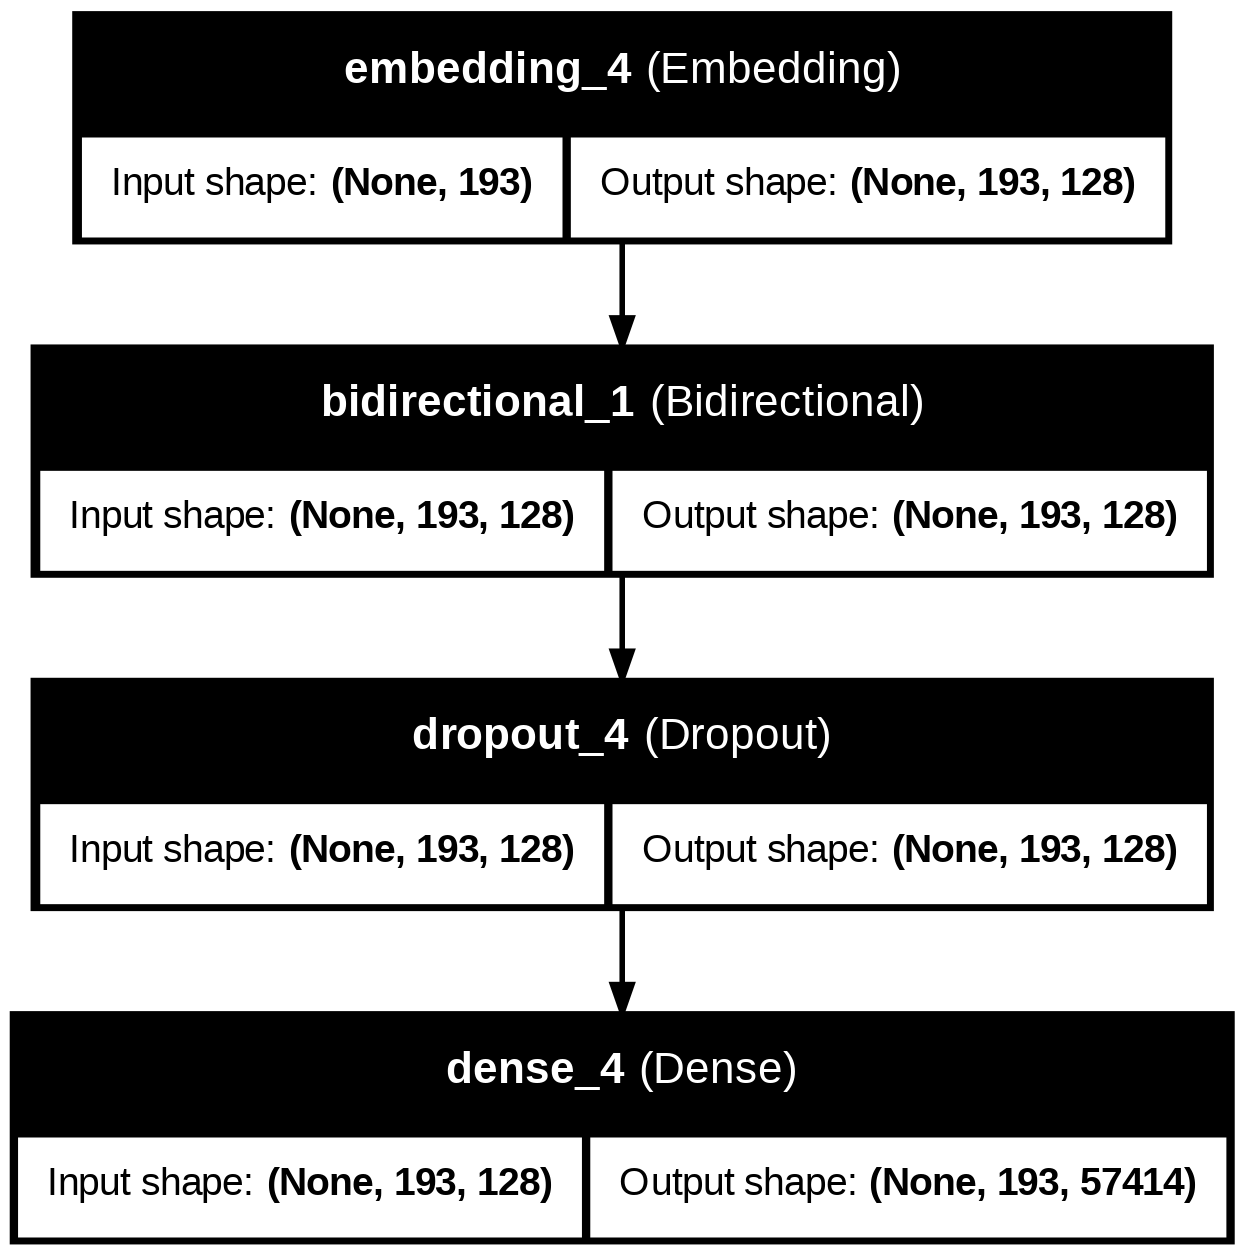

In [ ]:
from keras.utils import plot_model

plot_model(bidirec_rnn, to_file='bidirec_rnn_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Reshaping the input (to be same as output)
X_train_reshaped = pad_sequences(X_train, maxlen=max_length_german, padding='post')
print("English Padded Sequences New Shape:", X_train_reshaped.shape)

English Padded Sequences New Shape: (27000, 193)


In [ ]:
# Train the model
filename = 'mt_bidirec_rnn_model.keras'
checkpoint = ModelCheckpoint(filename, monitor='val_accuracy', mode='max', save_best_only=True)   # Create checkpoint to save the model with best validation accuracy

bidirec_rnn_history = bidirec_rnn.fit(X_train_reshaped, y_train, validation_split=0.2, epochs=5, batch_size=64, callbacks=[checkpoint], verbose=1)

Epoch 1/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 134s 386ms/step - accuracy: 0.7056 - loss: 10.0793 - val_accuracy: 0.8889 - val_loss: 2.7987
Epoch 2/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 117s 347ms/step - accuracy: 0.8885 - loss: 1.8911 - val_accuracy: 0.8889 - val_loss: 1.4918
Epoch 3/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 114s 338ms/step - accuracy: 0.8868 - loss: 1.5318 - val_accuracy: 0.8889 - val_loss: 1.4648
Epoch 4/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 115s 340ms/step - accuracy: 0.8759 - loss: 1.6296 - val_accuracy: 0.8684 - val_loss: 1.6717
Epoch 5/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 114s 338ms/step - accuracy: 0.8716 - loss: 1.6715 - val_accuracy: 0.8884 - val_loss: 1.5084


In [ ]:
# Get the training and validaiton loss
loss = bidirec_rnn_history.history['loss']
val_loss = bidirec_rnn_history.history['val_loss']

# Get the training and validation accuracy
acc = bidirec_rnn_history.history['accuracy']
val_acc = bidirec_rnn_history.history['val_accuracy']

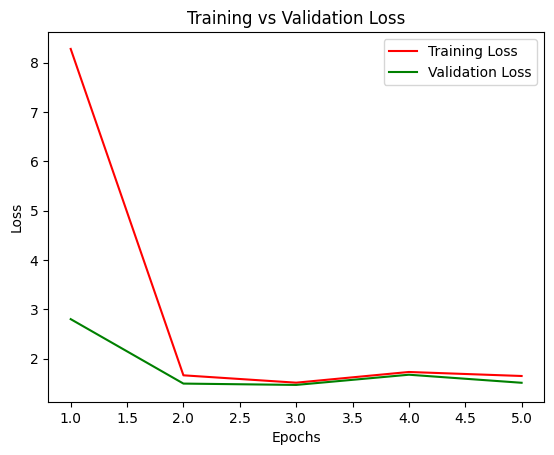

In [ ]:
# Plot training and validation loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

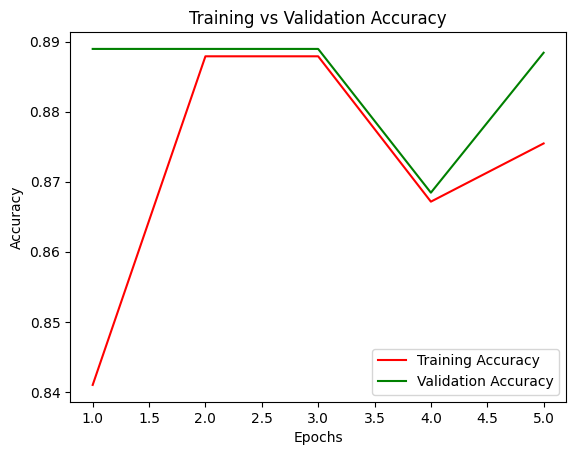

In [ ]:
# Plot training and validation accuracy
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Test the model
bidirec_rnn_model = load_model('mt_bidirec_rnn_model.keras')

print("Model output shape:", bidirec_rnn_model.output_shape)

Model output shape: (None, 193, 57414)


In [ ]:
# Reshaping the input (to be same as output)
X_test_reshaped = pad_sequences(X_test, maxlen=max_length_german, padding='post')
print("English Test Data New Shape:", X_test_reshaped.shape)

English Test Data New Shape: (3000, 193)


In [ ]:
# Evaluate the model on 100 samples from Test data
loss, accuracy = bidirec_rnn_model.evaluate(X_test_reshaped[:100], y_test[:100], verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 2.775775671005249
Test Accuracy: 0.8914507031440735


Bi-Directional RNN model with Embedding, also gives us a very good accuracy of ~89.14%

#### **Build, Train and Test a Bi-Directional LSTM Model**

In [ ]:
from keras.layers import TimeDistributed

In [ ]:
def bidirec_lstm_model():
    model = Sequential()
    model.add(Input(shape=(max_length_german,)))
    model.add(Embedding(input_dim=en_vocab_size, output_dim=128, input_length=max_length_german))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Dense(de_vocab_size, activation='softmax'))

    optimizer = SGD(learning_rate=0.001, clipvalue=0.5)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Build and Compile the model
bidirec_lstm = bidirec_lstm_model()

bidirec_lstm.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 193, 128)            │       4,050,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 193, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 193, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 193, 57414)          │       7,406,406 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,555,910 (44.08 MB)

 Trainable params: 11,555,910 (44.08 MB)

 Non-trainable params: 0 (0.00 B)

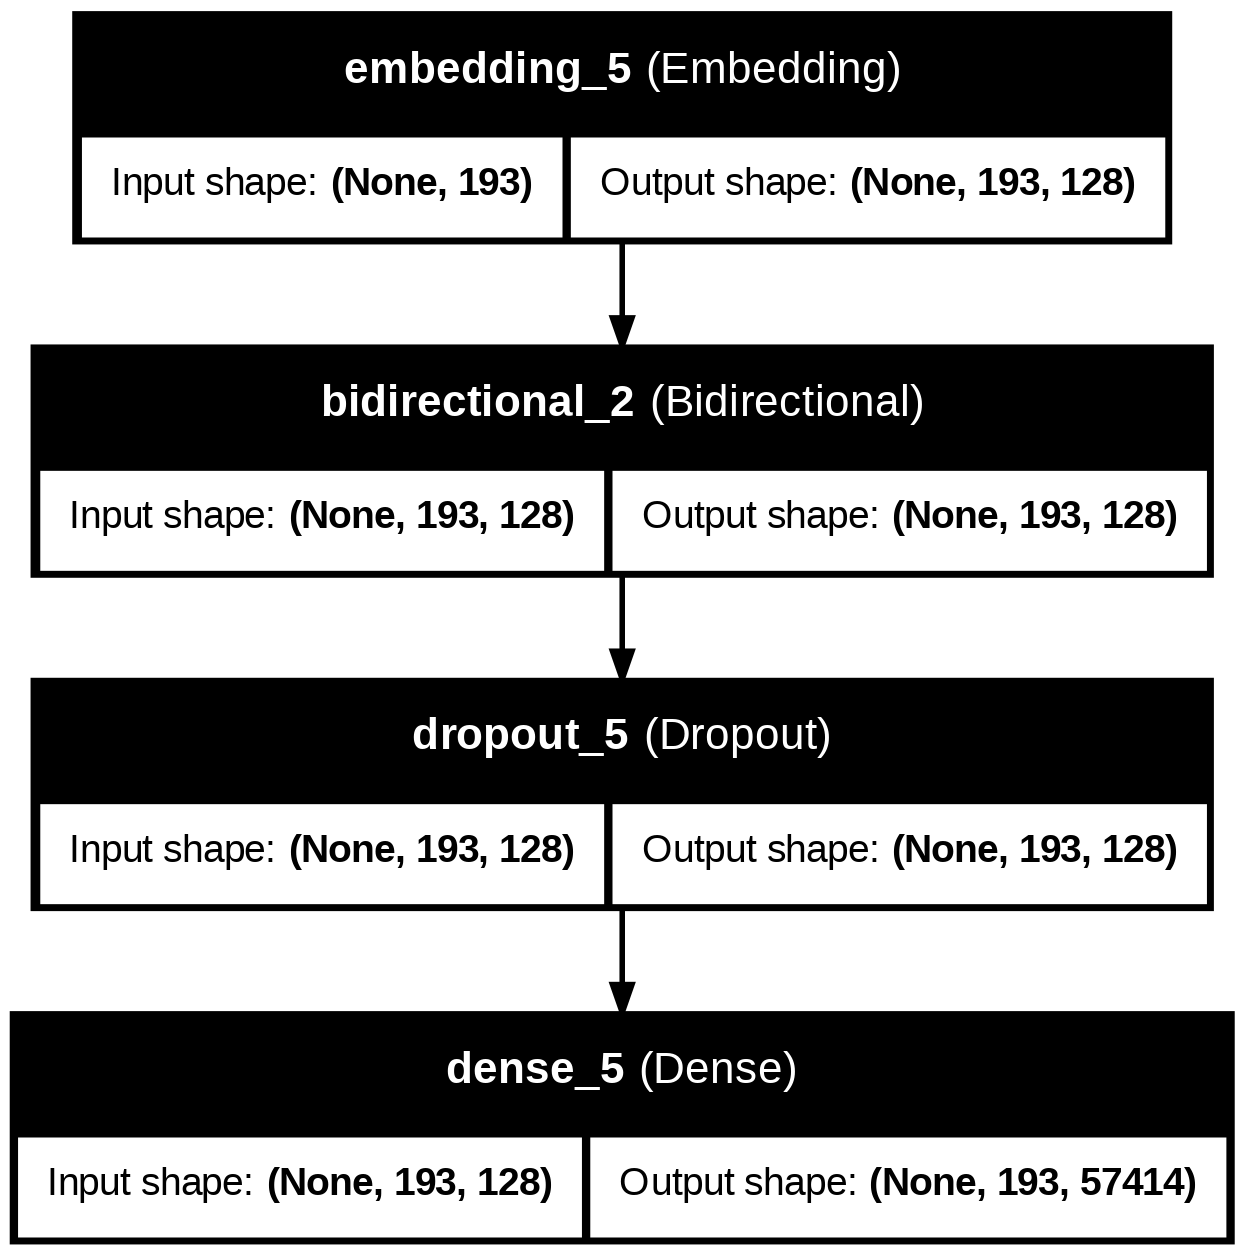

In [ ]:
from keras.utils import plot_model

plot_model(bidirec_lstm, to_file='bidirec_lstm_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Reshaping the input (to be same as output)
X_train_reshaped = pad_sequences(X_train, maxlen=max_length_german, padding='post')
print("English Padded Sequences New Shape:", X_train_reshaped.shape)

English Padded Sequences New Shape: (27000, 193)


In [ ]:
# Train the model
filename = 'mt_bidirec_lstm_model.keras'
checkpoint = ModelCheckpoint(filename, monitor='val_accuracy', mode='max', save_best_only=True)   # Create checkpoint to save the model with best validation accuracy

bidirec_lstm_history = bidirec_lstm.fit(X_train_reshaped, y_train, validation_split=0.2, epochs=5, batch_size=64, callbacks=[checkpoint], verbose=1)

Epoch 1/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 224s 660ms/step - accuracy: 0.7192 - loss: 10.9166 - val_accuracy: 0.8889 - val_loss: 10.7864
Epoch 2/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 225s 666ms/step - accuracy: 0.8878 - loss: 10.7398 - val_accuracy: 0.8889 - val_loss: 10.5827
Epoch 3/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 225s 666ms/step - accuracy: 0.8878 - loss: 10.5144 - val_accuracy: 0.8889 - val_loss: 10.2423
Epoch 4/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 225s 667ms/step - accuracy: 0.8885 - loss: 10.0795 - val_accuracy: 0.8889 - val_loss: 9.2978
Epoch 5/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 226s 669ms/step - accuracy: 0.8877 - loss: 8.7361 - val_accuracy: 0.8889 - val_loss: 6.0918


In [ ]:
# Get the training and validaiton loss
loss = bidirec_lstm_history.history['loss']
val_loss = bidirec_lstm_history.history['val_loss']

# Get the training and validation accuracy
acc = bidirec_lstm_history.history['accuracy']
val_acc = bidirec_lstm_history.history['val_accuracy']

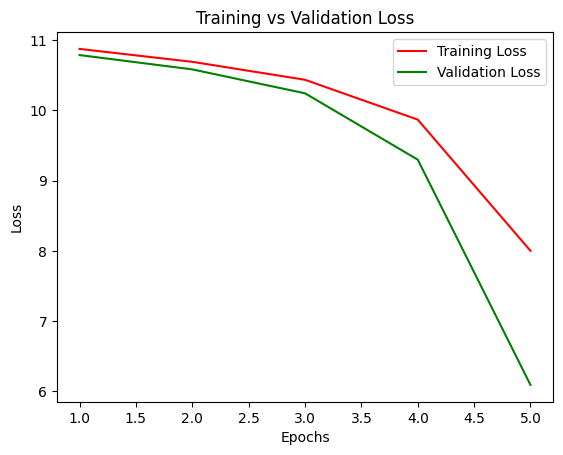

In [ ]:
# Plot training and validation loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

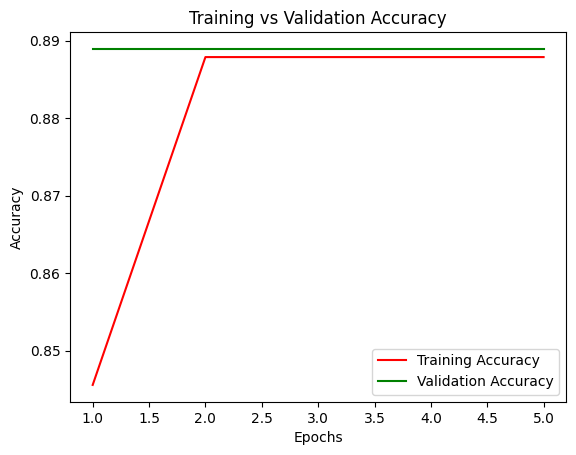

In [ ]:
# Plot training and validation accuracy
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Test the model
bidirec_lstm_model = load_model('mt_bidirec_lstm_model.keras')

print("Model output shape:", bidirec_lstm_model.output_shape)

Model output shape: (None, 193, 57414)


In [ ]:
# Reshaping the input (to be same as output)
X_test_reshaped = pad_sequences(X_test, maxlen=max_length_german, padding='post')
print("English Test Data New Shape:", X_test_reshaped.shape)

English Test Data New Shape: (3000, 193)


In [ ]:
# Evaluate the model on 100 samples from Test data
loss, accuracy = bidirec_lstm_model.evaluate(X_test_reshaped[:100], y_test[:100], verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 10.78596305847168
Test Accuracy: 0.8914507031440735


Bi-Directional LSTM model with Embedding, also gives us a very good accuracy of ~89.14%

### **Prediction and Translation**

In [ ]:
predictions = embed_lstm_model.predict(X_test_reshaped[:2])
predictions.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


(2, 193, 57414)

In [ ]:
predicted_indices = np.argmax(predictions, axis=-1)
predicted_indices.shape

(2, 193)

In [ ]:
# Convert predicted class indices to German words using the tokenizer
def indices_to_text(indices, tokenizer, pad_token='<pad>', end_token='<end>', unk_token='<unk>'):

    words = []

    for index in indices:
        # Get the word corresponding to the index from the tokenizer's index_word dictionary
        word = tokenizer.get(index, unk_token)   # Default to <unk> if index not found

        # Stop adding words if we encounter the end token
        if word == end_token:
            break

        # Skip padding tokens
        if word != pad_token:
            words.append(word)

    return ' '.join(words).strip()

In [ ]:
# Apply this function to each sequence of predicted indices
predicted_sentences = [indices_to_text(sequence, reverse_ger_tokenizer) for sequence in predicted_indices]

# Display the predicted sentences
for sentence in predicted_sentences:
    print(sentence)

<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk

## **Step 3: Design, Train and Test Encoder-Decoder LSTM Model**

#### **Build, Train and Test an Encoder-Decoder LSTM Model**

In [ ]:
from keras.models import Model

In [ ]:
def enc_dec_lstm_model():
    # Encoder
    encoder_inputs = Input(shape=(None,))
    encoder_embedding = Embedding(en_vocab_size, 128, input_length=max_length_english)(encoder_inputs)
    encoder_lstm = LSTM(64, return_state=True)
    encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
    encoder_states = [state_h, state_c]

    # Decoder
    decoder_inputs = Input(shape=(None,))
    decoder_embedding = Embedding(de_vocab_size, 128, input_length=max_length_german)(decoder_inputs)
    decoder_lstm = LSTM(64, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
    decoder_dense = Dense(de_vocab_size, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)

    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    optimizer = SGD(learning_rate=0.001, clipvalue=0.5)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Build and Compile the model
enc_dec_lstm = enc_dec_lstm_model()

enc_dec_lstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_9             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_8 (Embedding)   │ (None, None, 128)      │      4,050,688 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_9 (Embedding)   │ (None, None, 128)      │      7,348,992 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ [(None, 64), (None,    │         49,408 │ embedding_8[0][0]      │
│                           │ 64), (None, 64)]       │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ [(None, None, 64),     │         49,408 │ embedding_9[0][0],     │
│                           │ (None, 64), (None,     │                │ lstm_4[0][1],          │
│                           │ 64)]                   │                │ lstm_4[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, None, 57414)    │      3,731,910 │ lstm_5[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 15,230,406 (58.10 MB)

 Trainable params: 15,230,406 (58.10 MB)

 Non-trainable params: 0 (0.00 B)

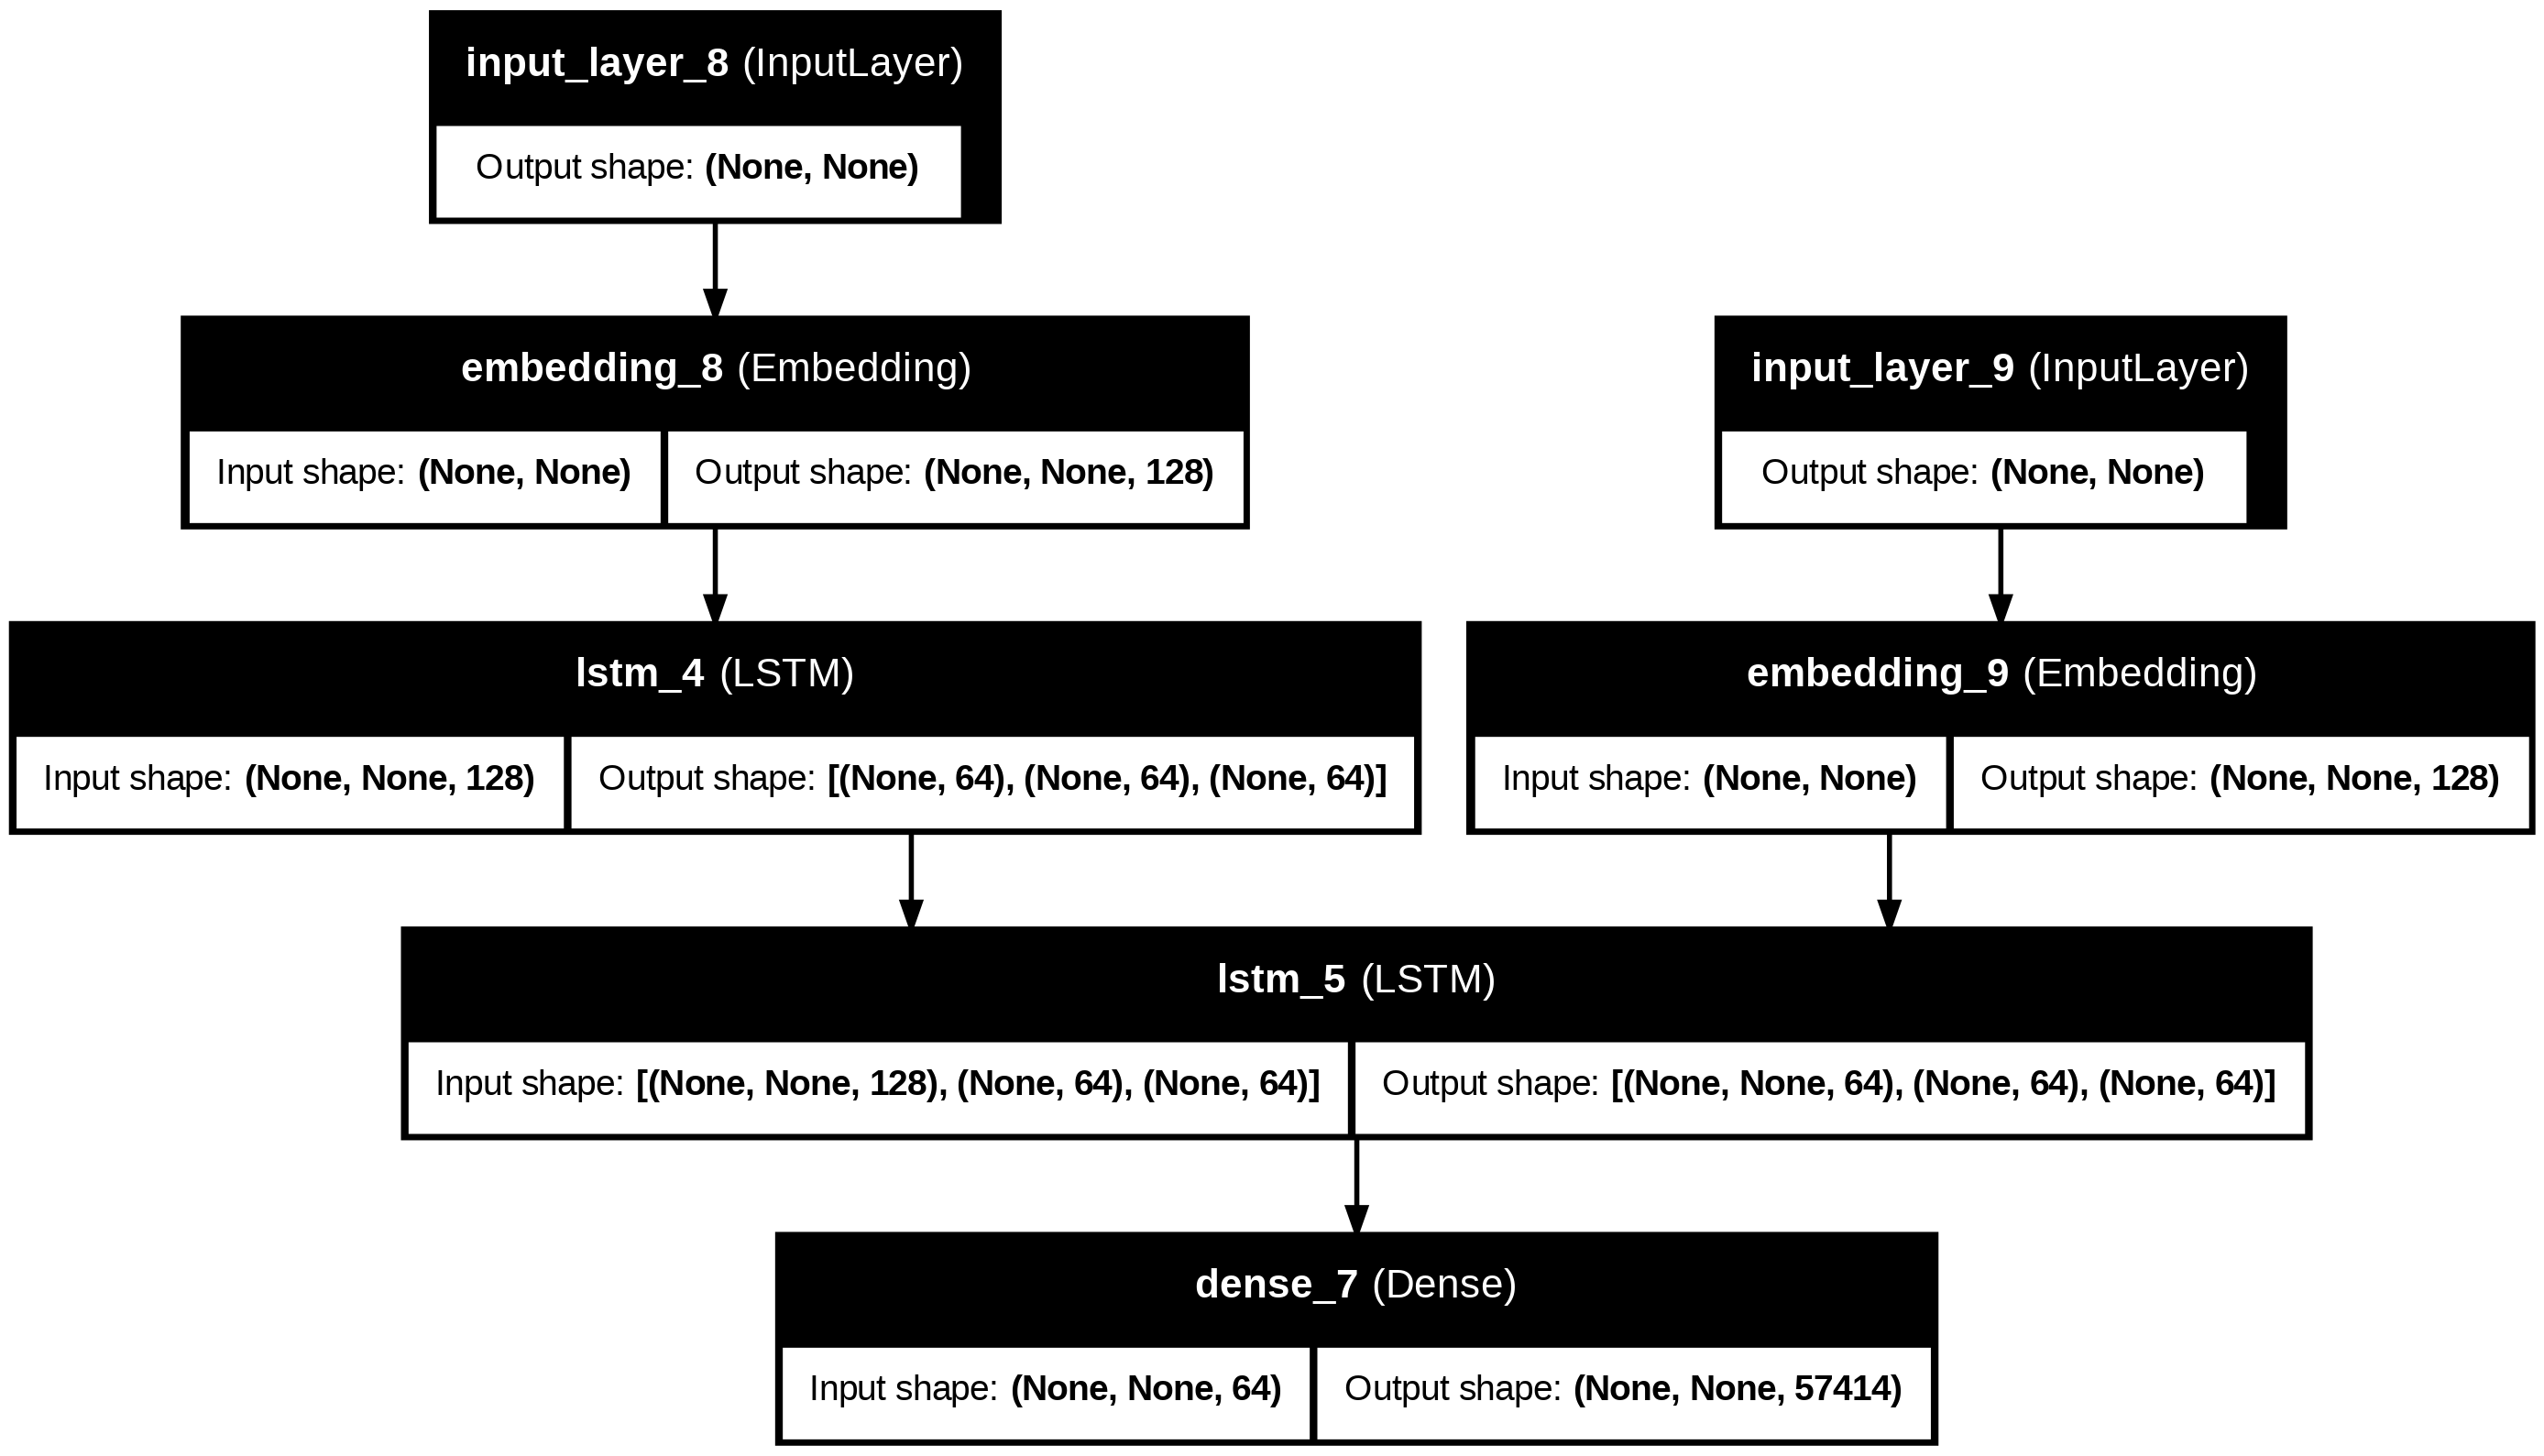

In [ ]:
from keras.utils import plot_model

plot_model(enc_dec_lstm, to_file='enc_dec_lstm_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model
filename = 'mt_enc_dec_lstm_model.keras'
checkpoint = ModelCheckpoint(filename, monitor='val_accuracy', mode='max', save_best_only=True)   # Create checkpoint to save the model with best validation accuracy

enc_dec_lstm_history = enc_dec_lstm.fit([X_train, y_train], y_train, validation_split=0.2, epochs=5, batch_size=64, callbacks=[checkpoint], verbose=1)

Epoch 1/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 181s 531ms/step - accuracy: 0.7458 - loss: 10.9206 - val_accuracy: 0.8889 - val_loss: 10.8013
Epoch 2/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 185s 547ms/step - accuracy: 0.8873 - loss: 10.7613 - val_accuracy: 0.8889 - val_loss: 10.6365
Epoch 3/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 185s 547ms/step - accuracy: 0.8883 - loss: 10.5917 - val_accuracy: 0.8889 - val_loss: 10.4428
Epoch 4/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 185s 546ms/step - accuracy: 0.8881 - loss: 10.3792 - val_accuracy: 0.8889 - val_loss: 10.1294
Epoch 5/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 185s 547ms/step - accuracy: 0.8885 - loss: 9.9747 - val_accuracy: 0.8889 - val_loss: 9.1876


In [ ]:
# Get the training and validaiton loss
loss = enc_dec_lstm_history.history['loss']
val_loss = enc_dec_lstm_history.history['val_loss']

# Get the training and validation accuracy
acc = enc_dec_lstm_history.history['accuracy']
val_acc = enc_dec_lstm_history.history['val_accuracy']

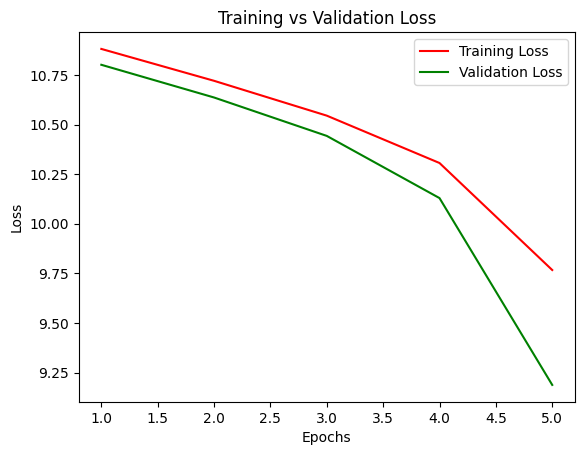

In [ ]:
# Plot training and validation loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

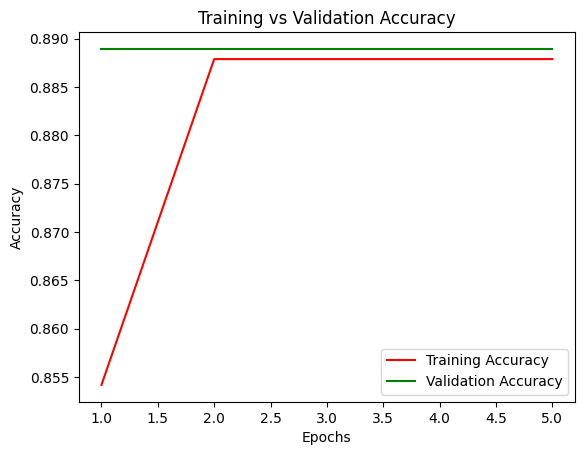

In [ ]:
# Plot training and validation accuracy
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Test the model
enc_dec_lstm_model = load_model('mt_enc_dec_lstm_model.keras')

print("Model output shape:", enc_dec_lstm_model.output_shape)

Model output shape: (None, None, 57414)


In [ ]:
# Evaluate the model on 100 samples from Test data
loss, accuracy = enc_dec_lstm_model.evaluate([X_test[:100], y_test[:100]], y_test[:100], verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 10.800890922546387
Test Accuracy: 0.8914507031440735


Encoder-Decoder LSTM model with Embedding, also gives us a very good accuracy of ~89.14%

### **Prediction and Translation**

In [ ]:
# Encoder
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(en_vocab_size, 128, input_length=max_length_english)(encoder_inputs)
encoder_lstm = LSTM(64, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(de_vocab_size, 128, input_length=max_length_german)(decoder_inputs)
decoder_lstm = LSTM(64, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(de_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Define inference model for encoding
encoder_model = Model(encoder_inputs, encoder_states)

# Define inference model for decoding
decoder_state_input_h = Input(shape=(64,))
decoder_state_input_c = Input(shape=(64,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_embedding2 = Embedding(de_vocab_size, 128, input_length=max_length_german)(decoder_inputs)
decoder_outputs2, state_h2, state_c2 = decoder_lstm(decoder_embedding2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2)

decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs2] + decoder_states2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
 #Function to translate a sentence
def translate(sentence):
    # Tokenize and pad the input sentence
    input_seq = en_tokenizer.texts_to_sequences([sentence])
    #input_seq = pad_sequences(input_seq, maxlen=max_length_german, padding='post')

    # Encode the input sentence
    states_value = encoder_model.predict(input_seq)

    # Generate the target sequence
    target_seq = np.zeros((1, 1))
    # Assuming <START> token exists, replace with your start token if different
    target_seq[0, 0] = 1 #ger_tokenizer.word_index.get('<START>', 1)

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        # Predict the next word
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = reverse_ger_tokenizer[sampled_token_index]

        if sampled_word == '<END>' or len(decoded_sentence.split()) > max_length_german:
            stop_condition = True
        else:
            decoded_sentence += ' ' + sampled_word

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [ ]:
# Test the model
test_sentence = 'iron cement is a ready for use paste which is laid as a fillet by putty knife or finger in the mould edges (corners) of the steel ingot mould'
translated_sentence = translate(test_sentence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━

In [ ]:
print('Translated Sentence:', translated_sentence)

Translated Sentence:  atommeilers atommeilers gezockt durchsetzen opfern oshakati finanzhilfen nachteil meßinstrument kreditwürdige finanzhilfen mackenziestrand eisenbahnstrecken zunge norman norman abgleiten would discussion discussion beitrittskandidaten optimalen landschaften moduls achtzehnten alla gesetzesform „kranken möchen möchen kollateralschaden kollateralschaden cocktailempfänge pgp hauptkriterium transportation usvizepräsidenten greifenden greifenden einleitend panorámica kostenaufwand juristen torheit bumbles zeilenscanner „clients lebst markführer markführer „bogens holt aufgereiht brustschild brustschild slot umfangreiches overlooks kleinlandwirtschaft bozica example arbeitsbeginns aufbesserte aufbesserte aufbesserte zurückblieb volltonfarben volltonfarben volltonfarben oberhoheit tötungen armutsfalle kommunikations naturereignisse schreibkundigen memoria religionsfreiheit vorhanden involved einiger hinzugefügt netzwerkwürmer mehrjahresprogramm lockere wolkenkratzer aufw

**Observations**

- With Encoder-Decoder model, we are able to perform English to German translation, even though the translation is not accurate.
- Note: The model accuracy is actually not the accuracy of translation itself, but the accuracy of model being able to find corresponding German word for the given English word. Also, it does not mean that the German word itself will be correct one, but just that a German word was successfully found by the model.So, for eg. 90% accuracy would mean that model is able to find German words for 90% of English words.
- This also explains the similar accuracy across models, as with limited training data, each model is able to find German words 90% of the time.
- With a bigger corpus of training data, we should be able to get pretty decent English to German translation model.

## **Step 4: Choose the best performing model and pickle it**

We cannot go by accuracy of model. But as we see Bidirectional Model is unable to produce any output, while Encoder-Decoder model is able to find German words. So, clearly the Encoder-Decoder is the best performing model and with bigger training dataset and sufficient computing resource, Encoder-Decoder model will be certainly be able to produce good results.

In [ ]:
#Pickling the Encoder-Decoder Model

import pickle

with open("machine_translation_model.pkl", "wb") as f:
    pickle.dump(enc_dec_lstm_model, f)

## **Step 5: Final Report**

***Project Final Report_Machine Translation_NLP2_Group11***

# **Milestone 3**

## **Design a clickable UI based Translation interface**

First we will use a pre-trained model from HuggingFace to perform and test the translation

In [ ]:
from transformers import FSMTForConditionalGeneration, FSMTTokenizer

In [ ]:
# The Pretrained Transformer Model to use
mname = "facebook/wmt19-en-de"

# Initialize the tokenizer (preprocessing methods)
tokenizer = FSMTTokenizer.from_pretrained(mname)

# Initialize/download pretrained model
model = FSMTForConditionalGeneration.from_pretrained(mname)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-en-de and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

In [ ]:
def translate(inputs, model = model, tokenizer=tokenizer):
    # preprocesses a string and returns pytorch tensors
    tokens = tokenizer.encode(inputs, return_tensors="pt")

    # using tokens generate output with the model
    outputs = model.generate(tokens)

    # Decode the generated tensor and return a human-readable string
    translation = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return translation

In [ ]:
# Test the translation
german = translate("iron cement is a ready for use paste which is laid as a fillet by putty knife or finger in the mould edges (corners) of the steel ingot mould")
german

'Eisenzement ist eine gebrauchsfertige Paste, die als Filet mit Spachtel oder Finger in die Kanten (Ecken) der Stahlbarren-Form gelegt wird.'

As pre-trained model provides us with correct translation, we will go ahead and use this to create a simple web app which will perform English to German translation

In [ ]:
import gradio as gr

In [ ]:
# Define the Gradio interface using the updated syntax
iface = gr.Interface(
    fn=translate,
    inputs=[gr.Textbox(lines=4, placeholder="Enter text here...")],
    outputs="text",
    title="English to German Translator",
)

# Launch the Gradio app inside the notebook
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d32ab6ca230b54068d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
